In [1]:
import pandas as pd
from pandas import DataFrame
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.parser import parse
%matplotlib inline
from pandas.plotting import autocorrelation_plot

In [2]:
ttc = pd.read_csv('ttc_delays_cleaned.csv', header = 0,  
                          encoding='utf8' , sep=",")

In [3]:
ttc.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Station_original,Line_ori,Code Description
0,1/1/2014,02:06,Wednesday,HIGH PARK,SUDP,3,7,West,Bloor-Danforth,5001.0,HIGH PARK STATION,BD,Disorderly Patron
1,1/1/2014,02:40,Wednesday,SHEPPARD - YU,MUNCA,0,0,NaN,Yonge-University,NaN,SHEPPARD STATION,YU,NaN
2,1/1/2014,03:10,Wednesday,LANSDOWNE,SUDP,3,8,West,Bloor-Danforth,5116.0,LANSDOWNE STATION,BD,Disorderly Patron
3,1/1/2014,03:20,Wednesday,BLOOR-YONGE - YU,MUSAN,5,10,South,Yonge-University,5386.0,BLOOR STATION,YU,Unsanitary Vehicle
4,1/1/2014,03:29,Wednesday,DUFFERIN,MUPAA,0,0,East,Bloor-Danforth,5174.0,DUFFERIN STATION,BD,Passenger Assistance Alarm Activated - No Trou...


In [4]:
ttc['Date'] = pd.to_datetime(ttc['Date'])

In [5]:
ttc['M/Y'] = ttc['Date'].apply(lambda x: "%d/%d" % (x.month, x.year))

In [6]:
ttc.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Station_original,Line_ori,Code Description,M/Y
0,2014-01-01,02:06,Wednesday,HIGH PARK,SUDP,3,7,West,Bloor-Danforth,5001.0,HIGH PARK STATION,BD,Disorderly Patron,1/2014
1,2014-01-01,02:40,Wednesday,SHEPPARD - YU,MUNCA,0,0,NaN,Yonge-University,NaN,SHEPPARD STATION,YU,NaN,1/2014
2,2014-01-01,03:10,Wednesday,LANSDOWNE,SUDP,3,8,West,Bloor-Danforth,5116.0,LANSDOWNE STATION,BD,Disorderly Patron,1/2014
3,2014-01-01,03:20,Wednesday,BLOOR-YONGE - YU,MUSAN,5,10,South,Yonge-University,5386.0,BLOOR STATION,YU,Unsanitary Vehicle,1/2014
4,2014-01-01,03:29,Wednesday,DUFFERIN,MUPAA,0,0,East,Bloor-Danforth,5174.0,DUFFERIN STATION,BD,Passenger Assistance Alarm Activated - No Trou...,1/2014


In [7]:
ttc_M_Code_Description = ttc.groupby(['M/Y', 'Code Description']).size()

In [8]:
ttc_M_Code_Description.tail()

M/Y     Code Description              
9/2017  Unauthorized at Track Level       19
        Unsanitary Vehicle                 6
        Work Vehicle                       1
        Work Zone Problems - Track         2
        Yard/Carhouse Related Problems     1
dtype: int64

In [9]:
type(ttc_M_Code_Description)

pandas.core.series.Series

In [10]:
a = ttc_M_Code_Description.reset_index()

In [11]:
a.head()

,M/Y,Code Description,0
0,1/2014,Air Conditioning,3
1,1/2014,Assault / Employee Involved,8
2,1/2014,Assault / Patron Involved,7
3,1/2014,Body,4
4,1/2014,Bomb Threat,1


In [12]:
a['M/Y'] = pd.to_datetime(a['M/Y'])

In [13]:
a.head()

,M/Y,Code Description,0
0,2014-01-01,Air Conditioning,3
1,2014-01-01,Assault / Employee Involved,8
2,2014-01-01,Assault / Patron Involved,7
3,2014-01-01,Body,4
4,2014-01-01,Bomb Threat,1


In [14]:
b = a.set_index('M/Y')
b.head()

,Code Description,0
M/Y,,
2014-01-01,Air Conditioning,3
2014-01-01,Assault / Employee Involved,8
2014-01-01,Assault / Patron Involved,7
2014-01-01,Body,4
2014-01-01,Bomb Threat,1


In [15]:
group_one = b.groupby(['Code Description','M/Y']).sum()
group_one.head()

0
Code Description M/Y          
Air Conditioning 2014-01-01  3
                 2014-02-01  2
                 2014-03-01  3
                 2014-04-01  2
                 2014-05-01  2

In [16]:
group_two = group_one.unstack().T
group_two.head()

Code Description  Air Conditioning  Alternating Current  \
  M/Y                                                     
0 2014-01-01                   3.0                  NaN   
  2014-02-01                   2.0                  NaN   
  2014-03-01                   3.0                  1.0   
  2014-04-01                   2.0                  NaN   
  2014-05-01                   2.0                  NaN   

Code Description  Assault / Employee Involved  Assault / Patron Involved  \
  M/Y                                                                      
0 2014-01-01                              8.0                        7.0   
  2014-02-01                              5.0                        6.0   
  2014-03-01                              6.0                        8.0   
  2014-04-01                             10.0                       13.0   
  2014-05-01                              6.0                       13.0   

Code Description  Axle Counter Related  Body  Bomb Threat  Brakes  \
  M/Y                                                               
0 2014-01-01                       NaN   4.0          1.0    21.0   
  2014-02-01                       NaN   1.0          NaN     8.0   
  2014-03-01                       NaN   NaN          NaN    16.0   
  2014-04-01                       NaN   4.0          1.0     9.0   
  2014-05-01                       NaN   1.0          NaN    18.0   

Code Description  Central Office Signalling System  Chopper Control  \
  M/Y                                                                 
0 2014-01-01                                   2.0              1.0   
  2014-02-01                                   NaN              NaN   
  2014-03-01                                   1.0              NaN   
  2014-04-01                                   NaN              NaN   
  2014-05-01                                   1.0              1.0   

Code Description               ...                Unsanitary Vehicle  \
  M/Y                          ...                                     
0 2014-01-01                   ...                               8.0   
  2014-02-01                   ...                              10.0   
  2014-03-01                   ...                              14.0   
  2014-04-01                   ...                               8.0   
  2014-05-01                   ...                              13.0   

Code Description  VCC/RCIU/CCR  Vehicle  Warning Alarm Systems  \
  M/Y                                                            
0 2014-01-01               NaN      NaN                    7.0   
  2014-02-01               NaN      NaN                    NaN   
  2014-03-01               1.0      NaN                    2.0   
  2014-04-01               5.0      NaN                    4.0   
  2014-05-01               1.0      NaN                    1.0   

Code Description  Weather Reports / Related Delays  Work Refusal  \
  M/Y                                                              
0 2014-01-01                                  17.0           2.0   
  2014-02-01                                  28.0           3.0   
  2014-03-01                                   9.0           3.0   
  2014-04-01                                   1.0           NaN   
  2014-05-01                                   NaN           1.0   

Code Description  Work Vehicle  Work Zone Problems - Signals  \
  M/Y                                                          
0 2014-01-01               1.0                           NaN   
  2014-02-01               1.0                           NaN   
  2014-03-01               NaN                           2.0   
  2014-04-01               3.0                           1.0   
  2014-05-01               3.0                           1.0   

Code Description  Work Zone Problems - Track  Yard/Carhouse Related Problems  
  M/Y                                                                         
0 2014-01-01       

In [17]:
group_two.index = group_two.index.get_level_values(1)
group_two.index

DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01'],
              dtype='datetime64[ns]', name='M/Y', freq=None)

In [18]:
c = group_two.resample('M').sum()
c.head()

Code Description,Air Conditioning,Alternating Current,Assault / Employee Involved,Assault / Patron Involved,Axle Counter Related,Body,Bomb Threat,Brakes,Central Office Signalling System,Chopper Control,...,Unsanitary Vehicle,VCC/RCIU/CCR,Vehicle,Warning Alarm Systems,Weather Reports / Related Delays,Work Refusal,Work Vehicle,Work Zone Problems - Signals,Work Zone Problems - Track,Yard/Carhouse Related Problems
M/Y,,,,,,,,,,,,,,,,,,,,,
2014-01-31,3.0,NaN,8.0,7.0,NaN,4.0,1.0,21.0,2.0,1.0,...,8.0,NaN,NaN,7.0,17.0,2.0,1.0,NaN,3.0,NaN
2014-02-28,2.0,NaN,5.0,6.0,NaN,1.0,NaN,8.0,NaN,NaN,...,10.0,NaN,NaN,NaN,28.0,3.0,1.0,NaN,3.0,NaN
2014-03-31,3.0,1.0,6.0,8.0,NaN,NaN,NaN,16.0,1.0,NaN,...,14.0,1.0,NaN,2.0,9.0,3.0,NaN,2.0,1.0,6.0
2014-04-30,2.0,NaN,10.0,13.0,NaN,4.0,1.0,9.0,NaN,NaN,...,8.0,5.0,NaN,4.0,1.0,NaN,3.0,1.0,5.0,1.0
2014-05-31,2.0,NaN,6.0,13.0,NaN,1.0,NaN,18.0,1.0,1.0,...,13.0,1.0,NaN,1.0,NaN,1.0,3.0,1.0,NaN,NaN


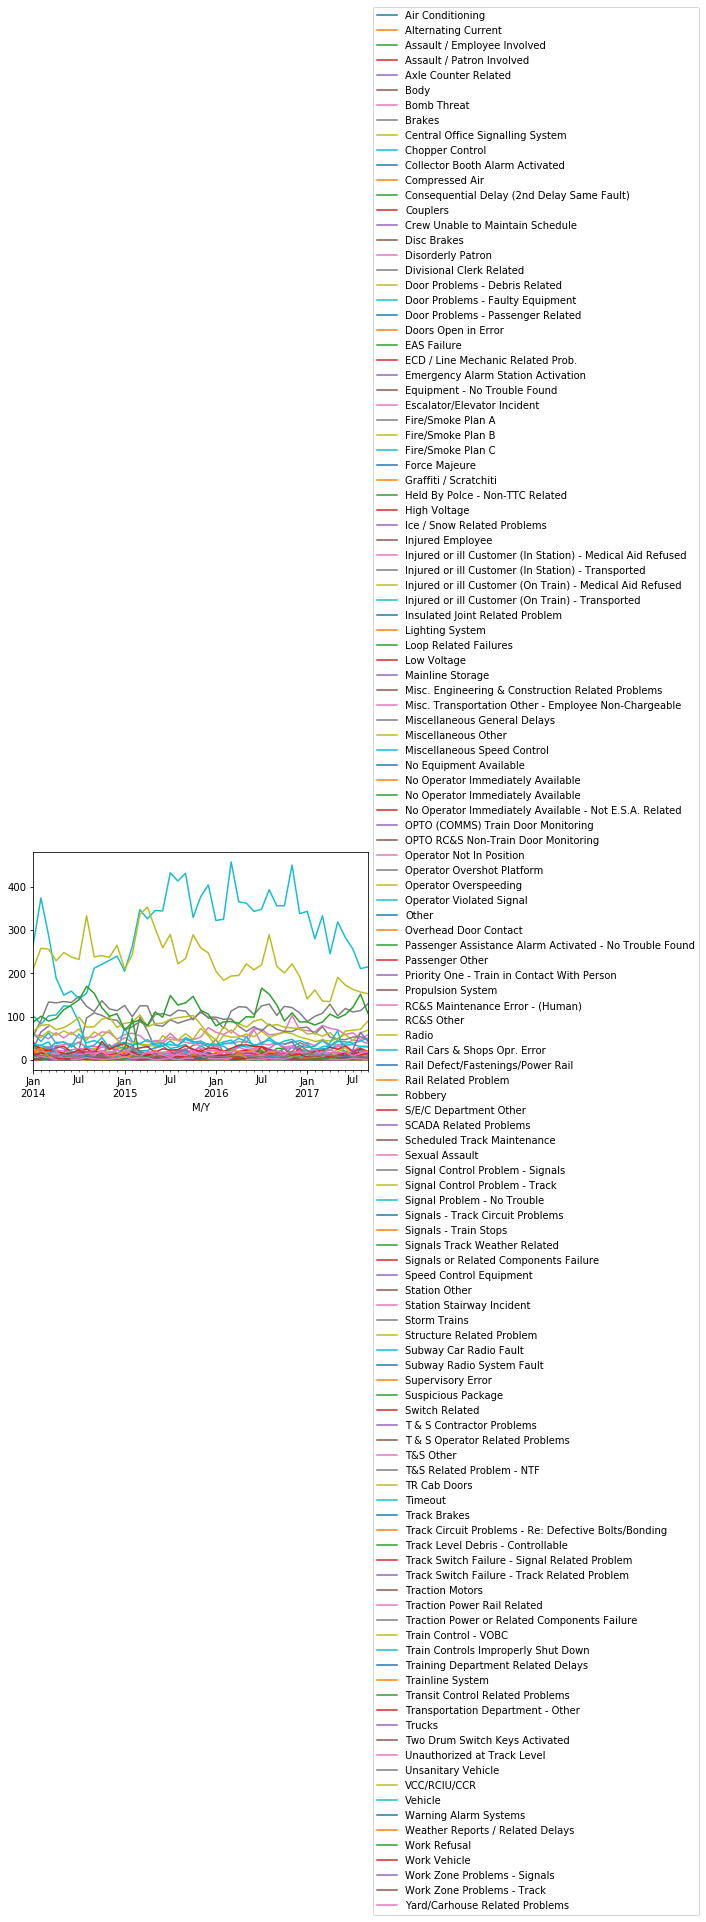

In [19]:
c.plot() ## flawed analysis, just cuz you counted which things happened more frequently does not mean that they took the longest amount of time. We need to create a new column that is the count value times the min delay
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [20]:
axy = c.count()
resulty = axy.sort_values(ascending = False)
top_ten_delaysy = resulty.head(10)
top_ten_delaysy

Code Description
Passenger Other                                             45
Miscellaneous General Delays                                45
Fire/Smoke Plan B                                           45
S/E/C Department Other                                      45
Propulsion System                                           45
Operator Overspeeding                                       45
Injured or ill Customer (On Train) - Medical Aid Refused    45
Injured or ill Customer (On Train) - Transported            45
Insulated Joint Related Problem                             45
Misc. Transportation Other - Employee Non-Chargeable        45
dtype: int64

In [21]:
top_ten_counts_df = c[['Fire/Smoke Plan B', 'Injured or ill Customer (On Train) - Transported', 'Disorderly Patron', 'Injured or ill Customer (On Train) - Medical Aid Refused',
                                   'Door Problems - Faulty Equipment', 'Priority One - Train in Contact With Person',
                                   'Unauthorized at Track Level', 'Passenger Other', 'Miscellaneous Other',
                                   'Passenger Assistance Alarm Activated - No Trouble Found']]

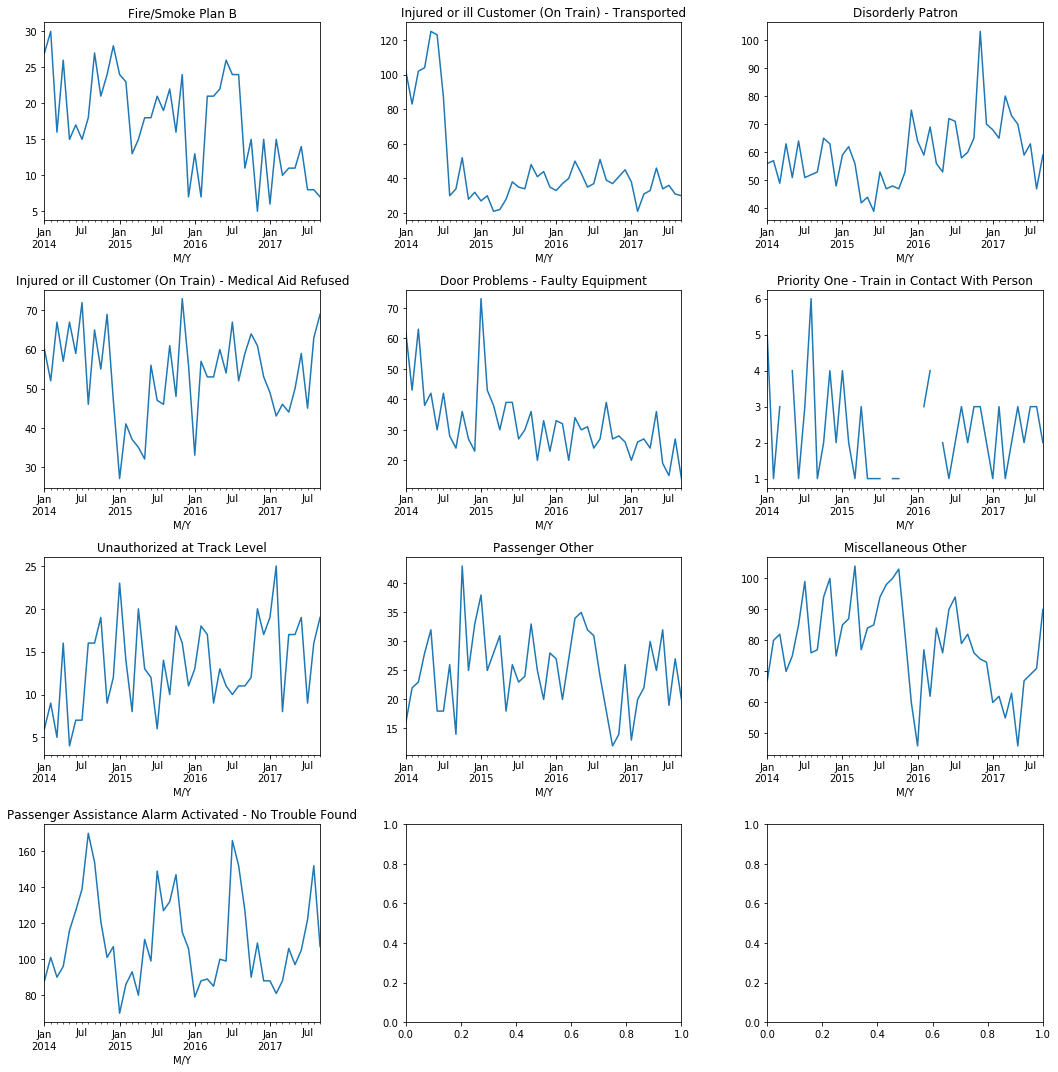

In [22]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

top_ten_counts_df['Fire/Smoke Plan B'].plot(ax=axes[0,0]); axes[0,0].set_title('Fire/Smoke Plan B')
top_ten_counts_df['Injured or ill Customer (On Train) - Transported'].plot(ax=axes[0,1]); axes[0,1].set_title('Injured or ill Customer (On Train) - Transported')
top_ten_counts_df['Disorderly Patron'].plot(ax=axes[0,2]); axes[0,2].set_title('Disorderly Patron')
top_ten_counts_df['Injured or ill Customer (On Train) - Medical Aid Refused'].plot(ax=axes[1,0]); axes[1,0].set_title('Injured or ill Customer (On Train) - Medical Aid Refused')
top_ten_counts_df['Door Problems - Faulty Equipment'].plot(ax=axes[1,1]); axes[1,1].set_title('Door Problems - Faulty Equipment')
top_ten_counts_df['Priority One - Train in Contact With Person'].plot(ax=axes[1,2]); axes[1,2].set_title('Priority One - Train in Contact With Person')
top_ten_counts_df['Unauthorized at Track Level'].plot(ax=axes[2,0]); axes[2,0].set_title('Unauthorized at Track Level')
top_ten_counts_df['Passenger Other'].plot(ax=axes[2,1]); axes[2,1].set_title('Passenger Other')
top_ten_counts_df['Miscellaneous Other'].plot(ax=axes[2,2]); axes[2,2].set_title('Miscellaneous Other')
top_ten_counts_df['Passenger Assistance Alarm Activated - No Trouble Found'].plot(ax=axes[3,0]); axes[3,0].set_title('Passenger Assistance Alarm Activated - No Trouble Found')

fig.tight_layout()
top_ten_counts_fig = plt.gcf()
top_ten_counts_fig.savefig('top_ten_counts_fig.png')
plt.show()

In [23]:
ttc.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Station_original,Line_ori,Code Description,M/Y
0,2014-01-01,02:06,Wednesday,HIGH PARK,SUDP,3,7,West,Bloor-Danforth,5001.0,HIGH PARK STATION,BD,Disorderly Patron,1/2014
1,2014-01-01,02:40,Wednesday,SHEPPARD - YU,MUNCA,0,0,NaN,Yonge-University,NaN,SHEPPARD STATION,YU,NaN,1/2014
2,2014-01-01,03:10,Wednesday,LANSDOWNE,SUDP,3,8,West,Bloor-Danforth,5116.0,LANSDOWNE STATION,BD,Disorderly Patron,1/2014
3,2014-01-01,03:20,Wednesday,BLOOR-YONGE - YU,MUSAN,5,10,South,Yonge-University,5386.0,BLOOR STATION,YU,Unsanitary Vehicle,1/2014
4,2014-01-01,03:29,Wednesday,DUFFERIN,MUPAA,0,0,East,Bloor-Danforth,5174.0,DUFFERIN STATION,BD,Passenger Assistance Alarm Activated - No Trou...,1/2014


df1.loc[:, lambda df: ['A', 'B']]

In [24]:
ttc_codes = ttc.loc[: , lambda ttc: ['M/Y', 'Code Description', 'Min Delay']]
ttc_codes.head()

,M/Y,Code Description,Min Delay
0,1/2014,Disorderly Patron,3
1,1/2014,NaN,0
2,1/2014,Disorderly Patron,3
3,1/2014,Unsanitary Vehicle,5
4,1/2014,Passenger Assistance Alarm Activated - No Trou...,0


In [25]:
ttc_codes['M/Y'] = pd.to_datetime(ttc_codes['M/Y'])

In [26]:
ttc_codes.head()

,M/Y,Code Description,Min Delay
0,2014-01-01,Disorderly Patron,3
1,2014-01-01,NaN,0
2,2014-01-01,Disorderly Patron,3
3,2014-01-01,Unsanitary Vehicle,5
4,2014-01-01,Passenger Assistance Alarm Activated - No Trou...,0


In [27]:
ttc_codesi = ttc_codes.set_index('M/Y')
ttc_codesi.head()

,Code Description,Min Delay
M/Y,,
2014-01-01,Disorderly Patron,3
2014-01-01,NaN,0
2014-01-01,Disorderly Patron,3
2014-01-01,Unsanitary Vehicle,5
2014-01-01,Passenger Assistance Alarm Activated - No Trou...,0


In [28]:
groupcodes = ttc_codesi.groupby(['Code Description','M/Y']).mean()
groupcodes.head()

Min Delay
Code Description M/Y                  
Air Conditioning 2014-01-01   3.666667
                 2014-02-01   4.500000
                 2014-03-01   8.000000
                 2014-04-01   4.000000
                 2014-05-01   3.000000

In [29]:
groupcodes_unstackedT = groupcodes.unstack().T
groupcodes_unstackedT.head()

Code Description      Air Conditioning  Alternating Current  \
          M/Y                                                 
Min Delay 2014-01-01          3.666667                  NaN   
          2014-02-01          4.500000                  NaN   
          2014-03-01          8.000000                 13.0   
          2014-04-01          4.000000                  NaN   
          2014-05-01          3.000000                  NaN   

Code Description      Assault / Employee Involved  Assault / Patron Involved  \
          M/Y                                                                  
Min Delay 2014-01-01                     1.125000                   3.571429   
          2014-02-01                     1.200000                   4.166667   
          2014-03-01                     1.833333                   4.875000   
          2014-04-01                     2.600000                   2.230769   
          2014-05-01                     0.000000                   3.538462   

Code Description      Axle Counter Related  Body  Bomb Threat    Brakes  \
          M/Y                                                             
Min Delay 2014-01-01                   NaN  3.25         29.0  3.095238   
          2014-02-01                   NaN  4.00          NaN  6.875000   
          2014-03-01                   NaN   NaN          NaN  5.500000   
          2014-04-01                   NaN  5.50         97.0  2.333333   
          2014-05-01                   NaN  5.00          NaN  5.166667   

Code Description      Central Office Signalling System  Chopper Control  \
          M/Y                                                             
Min Delay 2014-01-01                              10.0              4.0   
          2014-02-01                               NaN              NaN   
          2014-03-01                               5.0              NaN   
          2014-04-01                               NaN              NaN   
          2014-05-01                              10.0              3.0   

Code Description                   ...                Unsanitary Vehicle  \
          M/Y                      ...                                     
Min Delay 2014-01-01               ...                          4.250000   
          2014-02-01               ...                          4.700000   
          2014-03-01               ...                          4.357143   
          2014-04-01               ...                          3.625000   
          2014-05-01               ...                          6.153846   

Code Description      VCC/RCIU/CCR  Vehicle  Warning Alarm Systems  \
          M/Y                                                        
Min Delay 2014-01-01           NaN      NaN               4.857143   
          2014-02-01           NaN      NaN                    NaN   
          2014-03-01           5.0      NaN               2.000000   
          2014-04-01           1.8      NaN               4.250000   
          2014-05-01           5.0      NaN               6.000000   

Code Description      Weather Reports / Related Delays  Work Refusal  \
          M/Y                                                          
Min Delay 2014-01-01                         20.941176          12.5   
          2014-02-01                         30.214286           4.0   
          2014-03-01                          3.444444           0.0   
          2014-04-01                          2.000000           NaN   
          2014-05-01                               NaN           4.0   

Code Description      Work Vehicle  Work Zone Problems - Signals  \
          M/Y                                                      
Min Delay 2014-01-01          16.0                           NaN   
          2014-02-01          10.0                           NaN   
          2014-03-01           NaN                           1.5   
          2014-04-01          13.0                          45.0   
        

In [30]:
groupcodes_unstackedT.index = groupcodes_unstackedT.index.get_level_values(1)
groupcodes_unstackedT.index

DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01'],
              dtype='datetime64[ns]', name='M/Y', freq=None)

In [31]:
resampledcodes = groupcodes_unstackedT.resample('M').mean()
resampledcodes.head()

Code Description,Air Conditioning,Alternating Current,Assault / Employee Involved,Assault / Patron Involved,Axle Counter Related,Body,Bomb Threat,Brakes,Central Office Signalling System,Chopper Control,...,Unsanitary Vehicle,VCC/RCIU/CCR,Vehicle,Warning Alarm Systems,Weather Reports / Related Delays,Work Refusal,Work Vehicle,Work Zone Problems - Signals,Work Zone Problems - Track,Yard/Carhouse Related Problems
M/Y,,,,,,,,,,,,,,,,,,,,,
2014-01-31,3.666667,NaN,1.125000,3.571429,NaN,3.25,29.0,3.095238,10.0,4.0,...,4.250000,NaN,NaN,4.857143,20.941176,12.5,16.0,NaN,16.666667,NaN
2014-02-28,4.500000,NaN,1.200000,4.166667,NaN,4.00,NaN,6.875000,NaN,NaN,...,4.700000,NaN,NaN,NaN,30.214286,4.0,10.0,NaN,4.000000,NaN
2014-03-31,8.000000,13.0,1.833333,4.875000,NaN,NaN,NaN,5.500000,5.0,NaN,...,4.357143,5.0,NaN,2.000000,3.444444,0.0,NaN,1.5,0.000000,1.0
2014-04-30,4.000000,NaN,2.600000,2.230769,NaN,5.50,97.0,2.333333,NaN,NaN,...,3.625000,1.8,NaN,4.250000,2.000000,NaN,13.0,45.0,8.400000,5.0
2014-05-31,3.000000,NaN,0.000000,3.538462,NaN,5.00,NaN,5.166667,10.0,3.0,...,6.153846,5.0,NaN,6.000000,NaN,4.0,5.0,0.0,NaN,NaN


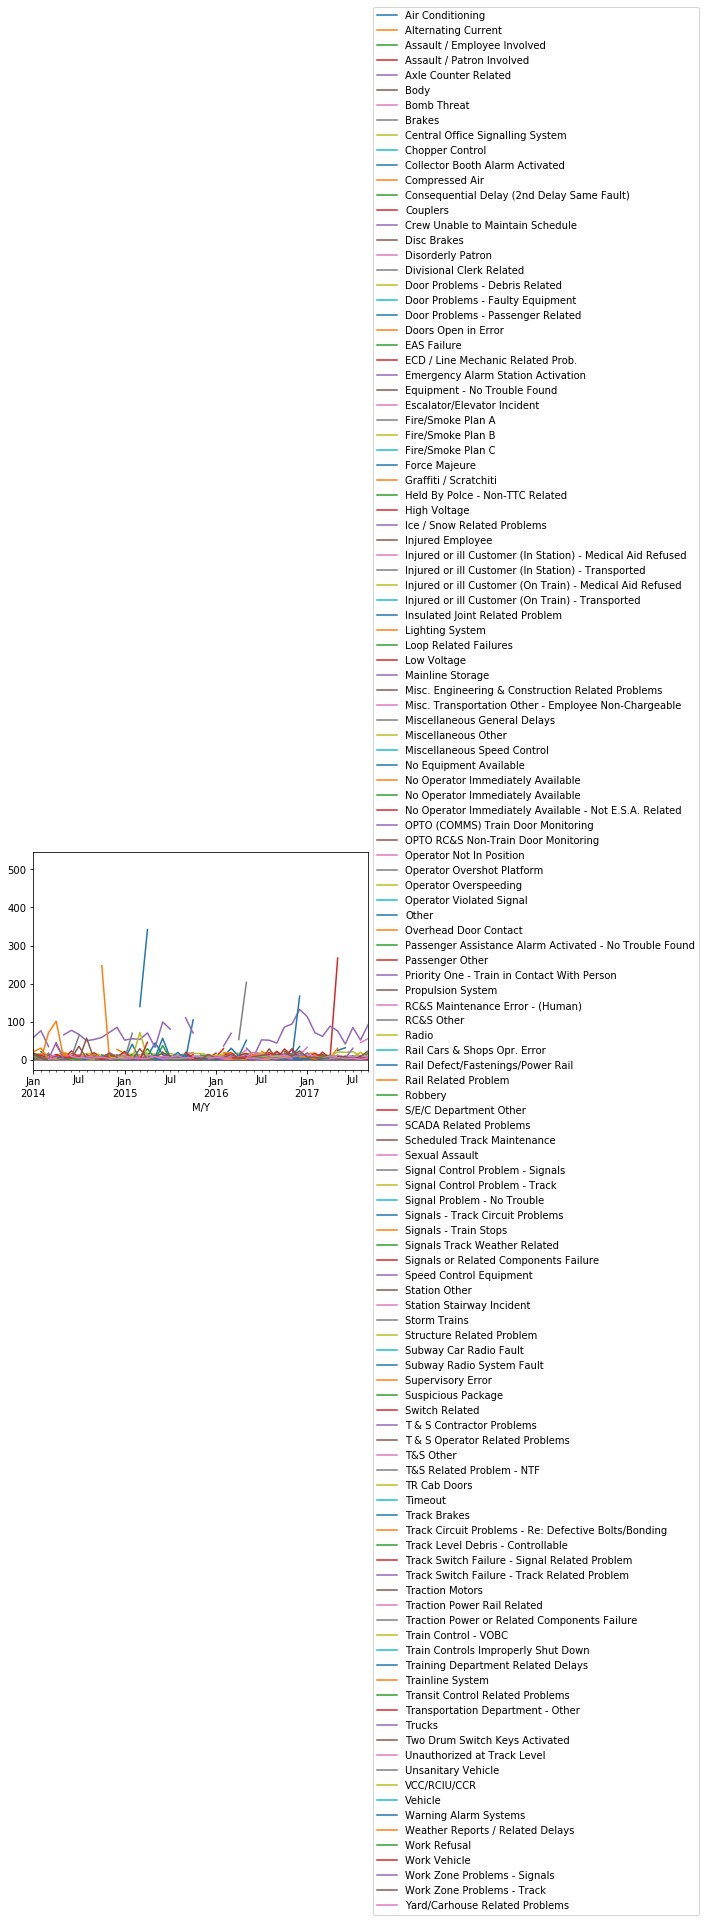

In [32]:
resampledcodes.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [33]:
ax = resampledcodes.mean()
result = ax.sort_values(ascending = False)
top_ten_delays = result.head(10)
top_ten_delays

Code Description
Force Majeure                                   77.062500
Priority One - Train in Contact With Person     66.823750
High Voltage                                    65.797619
Structure Related Problem                       56.500000
Rail Defect/Fastenings/Power Rail               48.715242
Traction Power Rail Related                     48.500000
Bomb Threat                                     29.938889
Vehicle                                         29.500000
Fire/Smoke Plan A                               26.641026
Traction Power or Related Components Failure    21.275000
dtype: float64

In [34]:
top_ten_delays_df = resampledcodes[['Fire/Smoke Plan B', 'Injured or ill Customer (On Train) - Transported', 'Disorderly Patron', 'Injured or ill Customer (On Train) - Medical Aid Refused',
                                   'Door Problems - Faulty Equipment', 'Priority One - Train in Contact With Person',
                                   'Unauthorized at Track Level', 'Passenger Other', 'Miscellaneous Other',
                                   'Passenger Assistance Alarm Activated - No Trouble Found']]

In [35]:
top_ten_delays_df.head()

Code Description,Fire/Smoke Plan B,Injured or ill Customer (On Train) - Transported,Disorderly Patron,Injured or ill Customer (On Train) - Medical Aid Refused,Door Problems - Faulty Equipment,Priority One - Train in Contact With Person,Unauthorized at Track Level,Passenger Other,Miscellaneous Other,Passenger Assistance Alarm Activated - No Trouble Found
M/Y,,,,,,,,,,
2014-01-31,14.666667,1.960784,4.125000,3.016667,4.370968,58.200000,11.833333,3.875000,0.880597,1.079545
2014-02-28,15.700000,2.373494,3.210526,2.807692,3.720930,76.000000,1.888889,2.318182,1.275000,1.059406
2014-03-31,10.062500,2.039216,3.163265,2.432836,4.063492,34.333333,8.000000,3.173913,1.609756,1.088889
2014-04-30,11.423077,2.605769,4.317460,2.789474,3.552632,NaN,11.312500,3.928571,1.300000,1.041667
2014-05-31,18.800000,1.680000,4.607843,2.029851,3.857143,65.250000,5.750000,4.437500,0.946667,0.801724


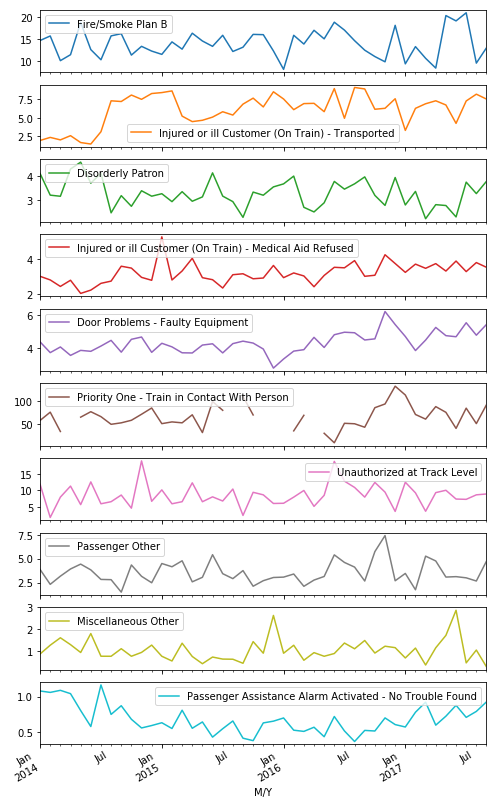

In [36]:
top_ten_delays_df.plot(subplots=True, figsize=(8, 15)); plt.legend(loc='best')

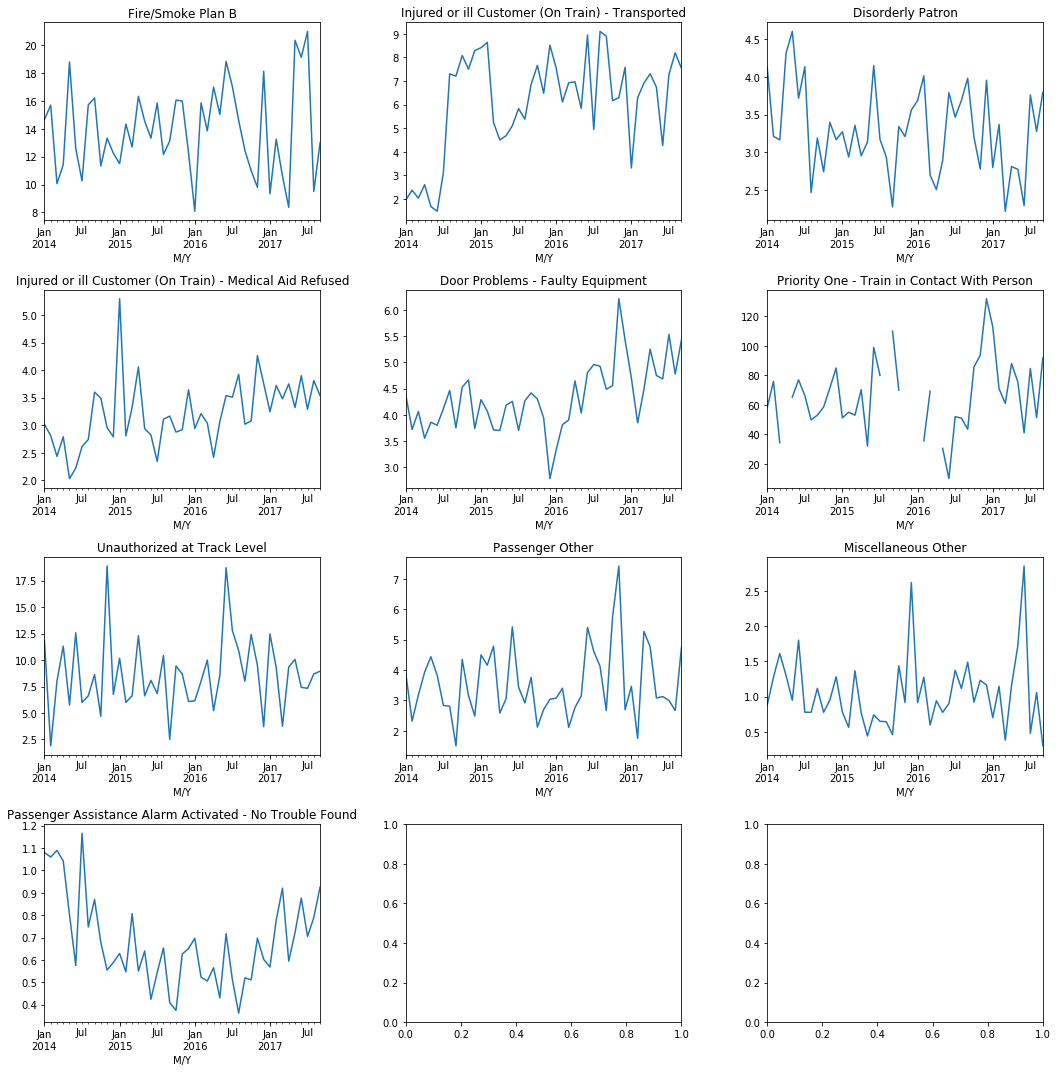

In [37]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

top_ten_delays_df['Fire/Smoke Plan B'].plot(ax=axes[0,0]); axes[0,0].set_title('Fire/Smoke Plan B')
top_ten_delays_df['Injured or ill Customer (On Train) - Transported'].plot(ax=axes[0,1]); axes[0,1].set_title('Injured or ill Customer (On Train) - Transported')
top_ten_delays_df['Disorderly Patron'].plot(ax=axes[0,2]); axes[0,2].set_title('Disorderly Patron')
top_ten_delays_df['Injured or ill Customer (On Train) - Medical Aid Refused'].plot(ax=axes[1,0]); axes[1,0].set_title('Injured or ill Customer (On Train) - Medical Aid Refused')
top_ten_delays_df['Door Problems - Faulty Equipment'].plot(ax=axes[1,1]); axes[1,1].set_title('Door Problems - Faulty Equipment')
top_ten_delays_df['Priority One - Train in Contact With Person'].plot(ax=axes[1,2]); axes[1,2].set_title('Priority One - Train in Contact With Person')
top_ten_delays_df['Unauthorized at Track Level'].plot(ax=axes[2,0]); axes[2,0].set_title('Unauthorized at Track Level')
top_ten_delays_df['Passenger Other'].plot(ax=axes[2,1]); axes[2,1].set_title('Passenger Other')
top_ten_delays_df['Miscellaneous Other'].plot(ax=axes[2,2]); axes[2,2].set_title('Miscellaneous Other')
top_ten_delays_df['Passenger Assistance Alarm Activated - No Trouble Found'].plot(ax=axes[3,0]); axes[3,0].set_title('Passenger Assistance Alarm Activated - No Trouble Found')

fig.tight_layout()
top_ten_counts_as_sum_fig = plt.gcf()
top_ten_counts_as_sum_fig.savefig('top_ten_counts_as_sum_fig.png')
plt.show()

plt.show()

In [38]:
'Fire/Smoke Plan B', 'Injured or ill Customer (On Train) - Transported', 'Disorderly Patron', 'Injured or ill Customer (On Train) - Medical Aid Refused',
                                   'Door Problems - Faulty Equipment', 'Priority One - Train in Contact With Person',
                                   'Unauthorized at Track Level', 'Passenger Other', 'Miscellaneous Other',
                                   'Passenger Assistance Alarm Activated - No Trouble Found'

IndentationError: unexpected indent (<ipython-input-38-1890616e40d9>, line 2)

In [ ]:
PAAA_fig = autocorrelation_plot(top_ten_counts_df['Passenger Assistance Alarm Activated - No Trouble Found'])

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

top_ten_counts_df['Passenger Assistance Alarm Activated - No Trouble Found'].plot(ax=axs[0]).set_title('Passenger Assistance Alarm Activated - No Trouble Found')
axs[0].set_ylabel('Event counts')
autocorrelation_plot(top_ten_counts_df['Passenger Assistance Alarm Activated - No Trouble Found'], ax=axs[1]).set_title('Autocorrelation plot')


fig.tight_layout()

Counts_fig = plt.gcf()
Counts_fig.savefig('Counts of PAAA and Autocorrelation.png')
plt.show()